# 1.Preparación

## 1.1.Cargar el dataset   [R]
### Penn Tree bank -- PTB en el original 
### Tablas de palabras en esta version  

In [1]:
# Montar google drive, con el objetivo de cargar el 'dataset' desde drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Establecer la ruta del 'dataset'
root_path = 'drive/My Drive/wm_cnn/'  
#data_folder = root_path + 'data/'
#ptb_test = data_folder + 'ptb.train.txt'
# Probar que se puede imprimir una línea.
#file1 = open(ptb_test,"r") 
#print(file1.readlines(10))

# Redefinir local_path por 'shared drive'
# Establecer el directorio del dataset.
#local_path= root_path 

# Establecer la ruta del 'dataset'
local_path = './'
#root_path = local_path
data_folder = root_path + 'data/'
language = 'English'
lang_test = data_folder +language+'.train.txt'
# Probar que se puede imprimir una línea.
file1 = open(lang_test,"r") 
print(file1.readlines(20))


[' h ɪ k ʌ p \n', ' s ɒ k \n', ' s t ɛ p d ɔː t ə ɹ \n']


## 1.2.Configurar los módulos 
- Configurar el entorno, librerías, función 'reader'.  
- Importar los datos - train, valid, test.  
- Visualizarlos.
- Establecer el tamaño de secuencia.

In [3]:
#copy the reader file to the root.
from shutil import copyfile
copyfile(root_path + '/'+ 'reader.py', 'reader.py')

'reader.py'

In [5]:
# Changed reader.  Recompile.
import py_compile
py_compile.compile('reader.py')

'__pycache__/reader.cpython-36.pyc'

In [6]:
# Importación de librerías.
from __future__ import print_function
import os
# Usar tarjeta simple. Se debe ejecutar antes de tensorflow.
os.environ["CUDA_VISIBLE_DEVICES"]="0" 
import pylab
%pylab inline
# Librerías gráficas
import matplotlib.pyplot as plt
import matplotlib  
%matplotlib inline
# Framework Tensorflow
import tensorflow as tf
# Librerías numéricas y para el uso de dataframes.
import numpy as np
import pandas as pd
import random

# Funciones para leer el dataset.
from reader import lang_raw_data, lang_producer # by Google

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
# Leer el dataset y preparar los conjuntos de entrenamiento, validación y prueba, e ID de palabras
train_data, valid_data, test_data, word_to_id = lang_raw_data(root_path + 'data', lang=language) # tokens
id_to_word = dict((v, k) for k, v in word_to_id.items())
voc_size = len(id_to_word)
voc_size

49

In [8]:
id_to_word

{0: '<eos>',
 1: 't',
 2: 'ɪ',
 3: 's',
 4: 'n',
 5: 'l',
 6: 'k',
 7: 'ə',
 8: 'd',
 9: 'r',
 10: 'm',
 11: 'p',
 12: 'ɹ',
 13: 'b',
 14: 'ɛ',
 15: 'f',
 16: 'æ',
 17: 'eɪ',
 18: 'əʊ',
 19: 'ʌ',
 20: 'aɪ',
 21: 'iː',
 22: 'ɡ',
 23: 'w',
 24: 'uː',
 25: 'v',
 26: 'ɑː',
 27: 'ɔː',
 28: 'ɒ',
 29: 'ʃ',
 30: 'h',
 31: 'z',
 32: 'ŋ',
 33: 'tʃ',
 34: 'ɜː',
 35: 'j',
 36: 'aʊ',
 37: 'l̩',
 38: 'θ',
 39: 'dʒ',
 40: 'n̩',
 41: 'ʊ',
 42: 'ð',
 43: 'ɪə',
 44: 'ɛə',
 45: 'ɔɪ',
 46: 'ʊə',
 47: 'ʒ',
 48: '#'}

In [9]:
# Imprimir la cantidad de archivos para validación, prueba.
print('Train data size: {0}, Valid data size: {1}, Test data size: {2}\n'.
      format(len(train_data), len(valid_data), len(test_data)))
print('train/val/test_data is a list, some elements in train_data is', train_data[:10])

Train data size: 5366, Valid data size: 1137, Test data size: 1165

train/val/test_data is a list, some elements in train_data is [30, 2, 6, 19, 11, 0, 3, 28, 6, 0]


In [10]:
# Agregar etiquetas inicio SS y fin EE.
id_to_word[voc_size]='<SS>' # Add start word token '<SS>'
id_to_word[voc_size+1]='<EE>' # Add end word token '<EE>'
word_to_id = dict((v, k) for k, v in id_to_word.items())
voc_size = len(id_to_word)
voc_size

51

In [11]:
# Imprimir los primeros y últimos 5 registros del dataframe word_id
word_id = pd.DataFrame.from_dict(word_to_id, orient='index').sort_values(by=0, ascending=True)
word_id.columns = ['id']
print(word_id.head())
print(word_id.tail())


       id
<eos>   0
t       1
ɪ       2
s       3
n       4
      id
ʊə    46
ʒ     47
#     48
<SS>  49
<EE>  50


In [12]:
# Imprimir los primeros y últimos 5 registros del dataframe id_word
id_word = pd.DataFrame.from_dict(id_to_word, orient='index')
id_word.columns = ['word']
print(id_word.head())
print(id_word.tail())

    word
0  <eos>
1      t
2      ɪ
3      s
4      n
    word
46    ʊə
47     ʒ
48     #
49  <SS>
50  <EE>


In [13]:
# Juntar e imprimir una secuencia.
' '.join([id_to_word[id] for id in train_data[:50]])

'h ɪ k ʌ p <eos> s ɒ k <eos> s t ɛ p d ɔː t ə ɹ <eos> θ r uː <eos> t uː <eos> n ɛ k <eos> t r ɒ f <eos> p r ɪ z ɜː v <eos> ʃ uː <eos> s ʌ m t'

In [0]:
# Establecer el tamaño de secuencia.
seq_len = 35

# 2.Gated CNN model  

- Las palabras en secuencia están representadas por sus «embeddings»  
- Aplicar convoluciones de ancho k a los «embeddings» para calcular matrices A y B.  
- Aplicar activación $\sigma()$ a la matrix B para construir la compuerta «gate» 
- Multiplicar por elemento entre A y B para aplicar el «gate».  Es como la función de GRU o LSTM!  
- Cada pila de convolución y «gate» es una unidad.  
- Apilar unidades para formar bloques.  
- Apilar bloques para formar «chunks».  
- Terminar con «softmax» para producir probabilidades de palabras.

### No es recurrente.  Es convolucional y se puede procesar en paralelo.  

[Language Modeling with Gated Convolutional Networks -- arxiv-1612.08083 -- Facebook AI Research](https://arxiv.org/abs/1612.08083)
![Gated CNN model](https://github.com/stikbuf/Language_Modeling/blob/dev/figures/Gated%20CNN.png?raw=true)

## 2.1.Data generator [J]

Al igual que la línea base de RNN.

- Capacitar para train, valid, y test  
- Aplicar randomizado a cada epoca
- Lotes de secuencias de seq_len
- Repetir bucle  
- Indicadores integrales y categóricos para las palabras.  

In [0]:

# El generador «Generator» entrega lotes de secuencias en forma de id y categoria (1-hot)
import random

from tensorflow.python.keras.utils import to_categorical 

def gen_word_word(batch_size=64, dataset='train'): # usamos 64 en vez de 128
    assert dataset in ['train', 'valid', 'test'], 'Dataset must be train or valid or test.'
    
    dic = {'train':train_data, 'valid':valid_data, 'test':test_data}
    data = dic[dataset]
    # Cada elemento de la data es una palabra. 
    
    while True:
        # Randomizar por posición inicial de palabra. No importa la integridad de las oraciones.
        rnd_idxs = list(range(len(data)-seq_len-1))
        random.shuffle(rnd_idxs)
        cnt = 0
        # Construir lotes. No importa el saldo de un lote, continuar randomizando.
        while cnt < len(rnd_idxs) - batch_size :
            # Es correcto 'i+seq_len'?
            X = np.array([[word_to_id['<SS>']] + data[i:i+seq_len] + [word_to_id['<EE>']]
                          for i in rnd_idxs[cnt:cnt+batch_size]])
            # Por qué 'Y' excluye el inicial y 'X' excluye el último? Son <SS> y <EE>.
            # Y es copia de X solo excluye el initio <SS>
            # X es copia de X solo excluye el final <EE>
            # Como en traduccion, el Y anticipa el X
            Y = X[:,1:]
            X = X[:,:-1]
            Y = to_categorical(Y, num_classes=voc_size)
            #print(X.shape)
            cnt += batch_size
            yield X, Y

In [16]:
# Primera secuencia de 'train' para observar.
for x, y in gen_word_word():
  print(len(x))
  print(x.shape, y.shape)
  print(x[0])
  print(x[1])
  print(' '.join([id_to_word[id] for id in x[0]]))
  print(' '.join([id_to_word[id] for id in x[1]]))
  print(len(y))
  print(y[0])
  print(y[1])
  break

64
(64, 36) (64, 36, 51)
[49  6  0 11  5 16  3  1  2  6  0  5 28  6  0 15 28  9  2  3  1  0  9 24
 10  0  5 19 25  0  1  7 13 16  6 18]
[49  0 11 26 10  0 15  7 22  2 25  0  8 24  0 39 19 39 10  7  4  1  0  9
 14 15 35 24  3  0  8 34  1  2  0 10]
<SS> k <eos> p l æ s t ɪ k <eos> l ɒ k <eos> f ɒ r ɪ s t <eos> r uː m <eos> l ʌ v <eos> t ə b æ k əʊ
<SS> <eos> p ɑː m <eos> f ə ɡ ɪ v <eos> d uː <eos> dʒ ʌ dʒ m ə n t <eos> r ɛ f j uː s <eos> d ɜː t ɪ <eos> m
64
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## 2.2.Imports [J]

- Es convolución «causal» . 
- Las entradas son antes de las salidas.  
- De verdad es necesario?  

The tf integrated keras does not support causal convolution, i.e. padding param can not be 'causal' in Conv1D. (see [WaveNet: A Generative Model for Raw Audio, section 2.1.](https://arxiv.org/abs/1609.03499) ), so we use original keras instead.

![causal convolutional layers](https://github.com/stikbuf/Language_Modeling/blob/dev/figures/causal_convolution.png?raw=true)

I recommend that you read the paper section 2

In [17]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

## 2.3.Arquitectura [J]  

- Definir varias arquitecturas de unidades, bloques y «chunks»  
- Segun el paper, [k, n] => [ancho de convolución, cantidad filtros]  
- 128 hasta 4096 filtros!!!  
- Usamos la red convolucional GCNN_8B.  

Model config
![model configuration](https://github.com/stikbuf/Language_Modeling/blob/dev/figures/gCNNConfig.png?raw=true)

In [18]:
 
# embedding_size=128 en el paper base.
# cambiamos el embedding_size a 10 o 20.
GCNN_13 = [ [(4, 1268)] ]*1 ,\
          [ [(4,1268), (4,1268)] ]*12 
    
GCNN_14B = [ [(5, 512)] ]*1 ,\
           [ [(1,128), (5,128), (1,512)] ]*3 ,\
           [ [(1,512), (5,512), (1,1024)] ]*3 ,\
           [ [(1,1024), (5,1024), (1,2048)] ]*6 ,\
            [ [(1,1024), (5,1024), (1,4096)] ]*1 
            
GCNN_9 = [ [(4, 807)] ]*1 ,\
          [ [(4,807), (4,807)] ]*4  
    
GCNN_8B = [ [(1, 512)] ]*1 ,\
           [ [(1,128), (5,128), (1,512)] ]*3 ,\
           [ [(1,256), (5,256), (1,512)] ]*3 ,\
           [ [(1,1024), (1,1024), (1,2048)] ]*1 

# embedding_size=208 in the paper
GCNN_8 = [ [(4, 900)] ]*1 ,\
           [ [(4,900)] ]*7

GCNN_14 = [ [(6, 850)] ]*3 ,\
           [ [(1,850)] ]*1 ,\
           [ [(5,850)] ]*4 ,\
           [ [(1,850)] ]*1 ,\
            [ [(4,850)] ]*3 ,\
            [ [(4,1024)] ]*1 ,\
            [ [(4,2048)] ]*1  
 
#
# Definido para el modelo de Words.

GCNN_8BS = [ [(1, 8)] ]*1 ,\
           [ [(1,8), (5,8), (1,16)] ]*1

GCNN_8S = [ [(4, 4)] ]*1 ,\
           [ [(4, 4)] ]*7


modelParam = GCNN_8BS
#modelParam = GCNN_8S

modelParam

([[(1, 8)]], [[(1, 8), (5, 8), (1, 16)]])

I call:  
"(4, 1268)" a unit  
"[(4, 1268), (4, 1268)]" a block  
"[(4, 1268), (4, 1268)] * 12" a chunk  
A model is made by chunks.

GLU layer:
$$h_l(X) = (\textbf{X} * \textbf{W} + \textbf{b}) \otimes \sigma(\textbf{X} * \textbf{V} + \textbf{c})$$
implemented in `gatedCNNUnit()`

- Gated linear unit (GLU) - una unidad - una capa de «gated convolución»  
  - Mira arriba como es la construccion de un GLU
- Bloques compuesto de unidades - de capas  
  - Bloque tiene entrada agregada a su salida como en ResNet  
- Chunks compuesto de bloques.

In [0]:
# Define unidad y chunk. Bloque esta dentro el chunk.
from keras.layers import Conv1D, Multiply, Add, Input, Dense, Embedding
from keras.models import Model
from keras import backend as K

# Una unidad consiste en una convolucion (lineal), gate (sigmoidal)
# entrada, y salida de convolución «gated» por el sigmoid.
def gatedCNNUnit(kernel_size=3, filters=1024, input_shape=None):
    inputs = Input(shape=input_shape)
    conv = Conv1D(filters=filters, kernel_size=kernel_size, data_format='channels_last',
                  strides=1, padding='causal')(inputs)
    gated = Conv1D(filters=filters, kernel_size=kernel_size, data_format='channels_last',
                   strides=1, padding='causal', activation='sigmoid')(inputs)
    value = Multiply()([conv, gated])
    return Model(inputs=inputs, outputs=value)
    

# Un chunk consiste en algunos bloques de unidades, entrada y salida.
# Los bloques agregan sus entradas a sus salidas como en ResNet.
def gatedCNNChunk(chunk, input_shape):
    origin = Input(shape=input_shape)
    inputs = origin
    # Un chunk tiene múltiples bloques.
    # No necesariamente iguales.
    # Construir cada bloque.
    for block in chunk:
        x = inputs
        for unit in block:
            kernel_size, filters = unit
            x = gatedCNNUnit(kernel_size=kernel_size, filters=filters, input_shape=K.int_shape(x)[1:])(x)
        if K.int_shape(inputs)[-1] != K.int_shape(x)[-1]: # see Eqn.(2).in arxiv-1512.03385
            inputs = Dense( K.int_shape(x)[-1])(inputs)
            #print('DIM CHANGE IN RES MOD!!')
        # Agregar las entradas a las salidas del bloque.
        x = Add()([inputs, x])
        inputs = x
    return Model(inputs=origin, outputs=x)

## 2.4.Construimos el modelo de chunks según el modelParam  

- Empezamos con la capa de «embedding»  
- Preprocesamos el modelParam para construir los «chunks»  
- Terminamos con «softmax» para predecir las palabras.  

In [0]:
# Usamos embedding_size de 8 o 16 valores.
# Embedding size = c * sqrt(voc_size)
# Como voc_size ≈ 25..150 para casi todas las lenguas y familias, es suficiente.
embedding_size = 8 #16


In [21]:
# Construimos el modelo basado en la arquitectura designado en el modelParam.

inputs = Input(shape=(None,))
x = Embedding(input_dim=voc_size,
              output_dim=embedding_size)(inputs)
# Este bucle hace todo el trabajo de construcción!
for chunk in modelParam:
    x = gatedCNNChunk(chunk, K.int_shape(x)[1:])(x)

# Softmax para la salida.  
x = Dense(voc_size, activation='softmax')(x)
gCNNModel = Model(inputs=inputs, outputs=x)
gCNNModel.summary()




Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 8)           408       
_________________________________________________________________
model_2 (Model)              (None, None, 8)           144       
_________________________________________________________________
model_6 (Model)              (None, None, 16)          1232      
_________________________________________________________________
dense_2 (Dense)              (None, None, 51)          867       
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


## 2.4.X.Construimos embeddings with PPMI+SVD


In [37]:
# 0.PPMI+SVD.create a list for train data
#-----------------------------

'''
#total sequences 
total_seq = int(len(train_data)/seq_len) # 26,559 orations of 35 words.
#define a list
data = []
for i in range(total_seq):
     #make an oration for each 35 words.
     oration = ' '.join([id_to_word[id] for id in train_data[(i)*seq_len:(i+1)*seq_len]])
     #add each oration to the list 'data'
     data.append(oration)
#create a dataframe
df = pd.DataFrame({'oration':data})
print(df.head())
print(df.tail())
'''

filex = data_folder + 'English.train.txt'
df = pd.read_csv(filex, names = ['oration'])
df.head()


,oration
0,h ɪ k ʌ p
1,s ɒ k
2,s t ɛ p d ɔː t ə ɹ
3,θ r uː
4,t uː


In [38]:
# 1.PPMI+SVD. tokenizer
#-----------------------------

from __future__ import print_function, division
from collections import Counter
from itertools import combinations
from math import log
from pprint import pformat
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds
from string import punctuation
from time import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print('Ready')

# 1. Read and preprocess titles from HN posts.
punctrans = str.maketrans(dict.fromkeys(punctuation))
def tokenize(title):
    #x = title.lower() # Lowercase
    #x = x.encode('ascii', 'ignore').decode() # Keep only ascii chars.
    #x = x.translate(punctrans) # Remove punctuation
    x = title
    return x.split() # Return tokenized.

texts_tokenized = df['oration'].apply(tokenize)
print(texts_tokenized[:10])


Ready
0                 [h, ɪ, k, ʌ, p]
1                       [s, ɒ, k]
2    [s, t, ɛ, p, d, ɔː, t, ə, ɹ]
3                      [θ, r, uː]
4                         [t, uː]
5                       [n, ɛ, k]
6                    [t, r, ɒ, f]
7             [p, r, ɪ, z, ɜː, v]
8                         [ʃ, uː]
9          [s, ʌ, m, t, aɪ, m, z]
Name: oration, dtype: object


In [0]:
# Counters 

cx = Counter()
cxy = Counter()
for text in texts_tokenized:
    
    for x in text:
        cx[x] += 1

    # Count all pairs of words, even duplicate pairs.
    for x, y in map(sorted, combinations(text, 2)):
        cxy[(x, y)] += 1

In [42]:
print('Most common:', cx.most_common()[:25])

Most common: [('t', 317), ('ɪ', 272), ('s', 261), ('n', 248), ('l', 242), ('k', 208), ('ə', 206), ('d', 180), ('r', 174), ('m', 148), ('p', 143), ('ɹ', 119), ('b', 114), ('ɛ', 110), ('f', 105), ('æ', 103), ('eɪ', 100), ('əʊ', 87), ('ʌ', 86), ('aɪ', 84), ('iː', 74), ('ɡ', 70), ('w', 69), ('uː', 65), ('v', 64)]


In [0]:
# 3. Build unigram <-> index lookup.
x2i, i2x = {}, {}
for i, x in enumerate(cx.keys()):
    x2i[x] = i
    i2x[i] = x

In [0]:
# 4. Sum unigram and bigram counts for computing probabilities.
# i.e. p(x) = count(x) / sum(all counts).
sx = sum(list(cx.values()))
sxy = sum(list(cxy.values()))

In [45]:
# 5. Accumulate data, rows, and cols to build sparse PMI matrix
# Recall from the blog post that the PMI value for a bigram with tokens (x, y) is: 
# PMI(x,y) = log(p(x,y) / p(x) / p(y)) = log(p(x,y) / (p(x) * p(y)))
# The probabilities are computed on the fly using the sums from above.
ppmi_samples = Counter()
data, rows, cols = [], [], []
for (x, y), n in cxy.items():
    rows.append(x2i[x])
    cols.append(x2i[y])
    ppmi_xy = max(log((n / sxy) / (cx[x] / sx) / (cx[y] / sx)),0)
    data.append(ppmi_xy)
    ppmi_samples[(x, y)] = data[-1]
PPMI = csc_matrix((data, (rows, cols)))
print('%d non-zero elements' % PPMI.count_nonzero())
print('Sample PMI values\n', pformat(ppmi_samples.most_common()[:10]))

682 non-zero elements
Sample PMI values
 [(('j', 'ʊə'), 4.364174435175965),
 (('#', 'ɜː'), 4.120552352518215),
 (('n̩', 'ʒ'), 3.8602692542545483),
 (('#', 'ɑː'), 3.620596400989128),
 (('#', 'ɡ'), 3.48297502311308),
 (('ɛ', 'ʒ'), 3.030989899370023),
 (('j', 'uː'), 3.023000509336544),
 (('v', 'ʒ'), 2.8794400012428216),
 (('#', 's'), 2.860097038399691),
 (('ɛə', 'ɹ'), 2.7111847152340216)]


In [0]:
# 6. Factorize the PMI matrix using sparse SVD aka "learn the unigram/word vectors".
# This part replaces the stochastic gradient descent used by Word2vec
# and other related neural network formulations. We pick an arbitrary vector size k=20.
# vector size k = 8
U, _, _ = svds(PPMI, k=8)

In [0]:
# 7. Normalize the vectors to enable computing cosine similarity in next cell.
# If confused see: https://en.wikipedia.org/wiki/Cosine_similarity#Definition
norms = np.sqrt(np.sum(np.square(U), axis=1, keepdims=True))
U /= np.maximum(norms, 1e-7)

In [48]:
# Imprimiendo un embedding
print(len(U))
U[0]

48


array([ 0.44914937, -0.26545134, -0.57043456, -0.26086479, -0.35644222,
       -0.02268159, -0.20814573, -0.40430712])

In [57]:
# Evaluar las palabras más similares para un listado de palabras
k = 8
for x in ['ɛə','t', 'v','ə','ɑː']:
    dd = np.dot(U, U[x2i[x]]) # Cosine similarity for this unigram against all others.
    s = ''
    # Compile the list of nearest neighbor descriptions.
    # Argpartition is faster than argsort and meets our needs.
    for i in np.argpartition(-1 * dd, k + 1)[:k + 1]:
        if i2x[i] == x: continue
        xy = tuple(sorted((x, i2x[i])))
        s += '(%s, %.3lf) ' % (i2x[i], dd[i])
    print('%s, %d\n %s' % (x, cx[x], s))
    print('-' * 10)


# Fin de PPMI + SVD    

ɛə, 14
 (ɔː, 0.848) (f, 0.462) (ɪə, 0.805) (ð, 0.707) (ɡ, 0.707) (ɒ, 0.590) (ɑː, 0.773) (ə, 0.595) 
----------
t, 317
 (l, 0.769) (s, 0.763) (ɔɪ, 0.704) (v, 0.591) (n, 0.585) (ʊ, 0.695) (p, 0.534) (tʃ, 0.532) 
----------
v, 64
 (ɛ, 0.537) (m, 0.497) (ə, 0.656) (ð, 0.581) (ʊ, 0.765) (l, 0.609) (t, 0.591) (n̩, 0.481) 
----------
ə, 206
 (v, 0.656) (ɹ, 0.650) (ɛə, 0.595) (ɛ, 0.579) (ð, 0.583) (ɡ, 0.532) (ʊ, 0.515) (ɪ, 0.503) 
----------
ɑː, 61
 (ð, 0.883) (ʊ, 0.498) (ŋ, 0.436) (ɛə, 0.773) (ə, 0.474) (æ, 0.514) (ɔː, 0.700) (v, 0.373) 
----------


## 2.5.Detalles

- Computar la perplejidad y exactitud  
- Uso de RMSprop para simular el paper.  

In [0]:
# Perplejidad como categorical cross entropy.  
# perplexity
def PPL(y_true, y_pred):
    return tf.exp(tf.reduce_mean(tf.keras.backend.categorical_crossentropy(y_true, y_pred)))

# Exactitud como acuerdo entre predicción y observado.
def ACC(y_true, y_pred):
    ACC = tf.equal(tf.argmax(y_true, axis = 2), 
                   tf.argmax(y_pred, axis = 2))
    ACC = tf.cast(ACC, tf.float32)

    return tf.reduce_mean(ACC)

In [0]:
# Paper usa «Nesterov momentum» con «gradient clipping».
# RMSprop parece similar a esta combinación.
from keras.optimizers import RMSprop

optimizer = RMSprop(lr=1e-4)
gCNNModel.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=[ACC, PPL])

## 2.6.Entrenar (Fit) [J]

- Preparar el checkpoint y tensorboard  
- Entrenar el modelo usando fit_generator
  - Los datos vienen del generado Python (arriba)  
  - El history tiene el «loss, ppl, acc»  

In [0]:
# Configurar el tensorboard y checkpoint.
from keras.callbacks import TensorBoard, ModelCheckpoint
import os
if not os.path.exists(local_path + 'model/'):
    os.mkdir(local_path + 'model/')
# guarda el checkpoint en model.keras
path_model = local_path + 'model/model.keras'    
tensorboard = TensorBoard(log_dir='log')
# guarda el modelo durante entrenamiento.
checkpoint = ModelCheckpoint(filepath=path_model, verbose=1,
                             monitor='val_PPL',mode='min' ,save_best_only='True')
# path_model = local_path + 'model/model.keras'
# model.save(path_model)

callback_lists=[tensorboard,checkpoint]

In [0]:
# Usamos python generator (gen_word_word arriba) para entregar los datos.
# En otras maneras es similar a todos los «fit»
history = gCNNModel.fit_generator(generator=gen_word_word(batch_size=16), 
                           steps_per_epoch=100, epochs=100,
                           #steps_per_epoch=100, epochs=5,
                           callbacks=callback_lists,
                           validation_data=gen_word_word(dataset='valid'),
                           validation_steps=15)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










Epoch 1/100
100/100 [==============================] - 5s 49ms/step - loss: 3.9193 - ACC: 0.1040 - PPL: 50.3686 - val_loss: 3.9053 - val_ACC: 0.1733 - val_PPL: 49.6646


Epoch 00001: val_PPL improved from inf to 49.66460, saving model to ./model/model.keras
Epoch 2/100
100/100 [==============================] - 1s 12ms/step - loss: 3.8889 - ACC: 0.1895 - PPL: 48.8607 - val_loss: 3.8708 - val_ACC: 0.1888 - val_PPL: 47.9794

Epoch 00002: val_PPL improved from 49.66460 to 47.97944, saving model to ./model/model.keras
Epoch 3/100
100/100 [==============================] - 1s 12ms/step - loss: 3.8503 - ACC: 0.1872 - PPL: 47.0102 - val_loss: 3.8276 - val_ACC: 0.1875 - val_PPL: 45.9525

Epoch 00003: val_PPL improved from 47.97944 to 45.95255, saving model to ./model/model.keras
Epoch 4/100
100/100 [==============================] - 1s 12ms/step - loss: 3.8022 - ACC: 0.1863 - PPL: 44.8053 - 

## 2.7.Verificar [R]

- Generar el gráfico de perplejidad (train, valid).  
- Opcionales son: «loss, acc, ppl»  
- Usar el modelo para generar oraciones.
  - Brindar una secuencia inicial.  
  - Utilizar genLen para generar más palabras en secuencia.  

Index(['val_loss', 'val_ACC', 'val_PPL', 'loss', 'ACC', 'PPL'], dtype='object')


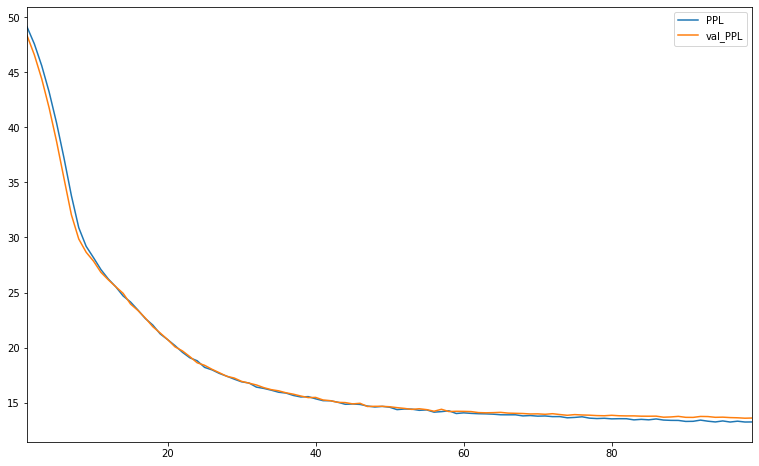

In [0]:
# Ploteamos el gráfico de perplejidad para los conjuntos de entrenamiento y validación.
logs = pd.DataFrame(history.history)
print(logs.columns)
pylab.rcParams['figure.figsize'] = (13, 8)
logs.loc[1:,['PPL','val_PPL']].plot()
plt.show()

In [0]:
# Definir una función que permita utilizar el modelo para predecir una secuencia.
def predict_seq(model, preSeq=None, genLen=seq_len, power=1):
    """ Predict a sequence with length genLen.
        arg:
            model: Keras model used to predict.
            preSeq: list. The leading sequence.
            genLen: float or np.inf. If power is equal to np.inf, then an argmax will be used. 
            power: Probility power.
    """
    # Establecer preSeq.
    preSeq = [word_to_id['<SS>']] if preSeq == None else [word_to_id['<SS>']] + preSeq   
    pointer = len(preSeq) - 1
    
    # Iterar genLen para agregar cada predicción a preSeq
    for _ in range(genLen):
        inputSeq = np.array([preSeq])
        prob = model.predict(inputSeq)[0, pointer, :]
        if power==np.inf:
            pred = np.argmax(prob)
        else:
            prob = np.power(prob, power)
            prob = prob / np.sum(prob)
            pred = np.random.choice(range(voc_size), p=prob)
        preSeq.append(pred)
        pointer = pointer + 1

    return preSeq, ' '.join([id_to_word[id] for id in preSeq])

In [0]:
# Predecir una secuencia.
_, seq = predict_seq(gCNNModel, power=1)
seq

'<SS> ɑː t <eos> ɪ l aɪ <eos> s ɑː n ɪ tʃ <eos> b aɪ æ m <eos> k ʌ l <eos> j uː <eos> h ʊ tʃ <eos> l eɪ l <eos> b ɪ'